In [7]:
import duckdb
import pandas as pd

# Define paths to CSV files
movies_path = r'C:\Users\marti\Downloads\ml-32m\ml-32m\movies.csv'
ratings_path = r'C:\Users\marti\Downloads\ml-32m\ml-32m\ratings.csv'
links_path = r'C:\Users\marti\Downloads\ml-32m\ml-32m\links.csv'
tags_path = r'C:\Users\marti\Downloads\ml-32m\ml-32m\tags.csv'

# Create tables in DuckDB
duckdb.sql(f"CREATE OR REPLACE TABLE movies AS SELECT * FROM read_csv_auto('{movies_path}')")
duckdb.sql(f"CREATE OR REPLACE TABLE ratings AS SELECT * FROM read_csv_auto('{ratings_path}')")
duckdb.sql(f"CREATE OR REPLACE TABLE links AS SELECT * FROM read_csv_auto('{links_path}')")
duckdb.sql(f"CREATE OR REPLACE TABLE tags AS SELECT * FROM read_csv_auto('{tags_path}')")

print("✓ All tables loaded successfully into DuckDB")
print(f"  - movies: {duckdb.sql('SELECT COUNT(*) as count FROM movies').df()['count'][0]} records")
print(f"  - ratings: {duckdb.sql('SELECT COUNT(*) as count FROM ratings').df()['count'][0]} records")
print(f"  - links: {duckdb.sql('SELECT COUNT(*) as count FROM links').df()['count'][0]} records")
print(f"  - tags: {duckdb.sql('SELECT COUNT(*) as count FROM tags').df()['count'][0]} records")

✓ All tables loaded successfully into DuckDB
  - movies: 87585 records
  - ratings: 32000204 records
  - links: 87585 records
  - tags: 2000072 records


In [2]:
# Query 3: Rating distribution
result3 = duckdb.sql("""
    SELECT rating,COUNT(*) as count_ratings, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM ratings), 2) as percentage
    FROM ratings
    GROUP BY rating
    ORDER BY rating
""").df()

print("""duckdb.sql(
    SELECT rating,COUNT(*) as count_ratings, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM ratings), 2) as percentage
    FROM ratings
    GROUP BY rating
    ORDER BY rating
)""")
print("QUERY: Rating Distribution")
print("=" * 60)
print(result3.to_string(index=False))
print()

duckdb.sql(
    SELECT rating,COUNT(*) as count_ratings, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM ratings), 2) as percentage
    FROM ratings
    GROUP BY rating
    ORDER BY rating
)
QUERY: Rating Distribution
 rating  count_ratings  percentage
    0.5         525132        1.64
    1.0         946675        2.96
    1.5         531063        1.66
    2.0        2028622        6.34
    2.5        1685386        5.27
    3.0        6054990       18.92
    3.5        4290105       13.41
    4.0        8367654       26.15
    4.5        2974000        9.29
    5.0        4596577       14.36



In [6]:
# Query 5: Top-rated movies (with minimum ratings threshold)
result5 = duckdb.sql("""
    SELECT 
        m.movieId,
        m.title,
        ROUND(AVG(r.rating), 2) as avg_rating,
        COUNT(r.rating) as total_ratings,
        MIN(r.rating) as min_rating,
        MAX(r.rating) as max_rating,
        
    FROM movies m
    JOIN ratings r ON m.movieId = r.movieId
    GROUP BY m.movieId, m.title
    HAVING COUNT(r.rating) >= 50
    ORDER BY avg_rating DESC
    LIMIT 10
""").df()
print("""duckdb.sql(
    SELECT 
        m.movieId,
        m.title,
        ROUND(AVG(r.rating), 2) as avg_rating,
        COUNT(r.rating) as total_ratings,
        MIN(r.rating) as min_rating,
        MAX(r.rating) as max_rating,
    FROM movies m
    JOIN ratings r ON m.movieId = r.movieId
    GROUP BY m.movieId, m.title
    HAVING COUNT(r.rating) >= 1000
    ORDER BY avg_rating DESC
    LIMIT 10
) """)
print("QUERY: Top 10 Highest-Rated Movies (>=1000 ratings)")
print("=" * 60)
print(result5.to_string(index=False))
print()

duckdb.sql(
    SELECT 
        m.movieId,
        m.title,
        ROUND(AVG(r.rating), 2) as avg_rating,
        COUNT(r.rating) as total_ratings,
        MIN(r.rating) as min_rating,
        MAX(r.rating) as max_rating,
    FROM movies m
    JOIN ratings r ON m.movieId = r.movieId
    GROUP BY m.movieId, m.title
    HAVING COUNT(r.rating) >= 1000
    ORDER BY avg_rating DESC
    LIMIT 10
) 
QUERY: Top 10 Highest-Rated Movies (>=1000 ratings)
 movieId                            title  avg_rating  total_ratings  min_rating  max_rating
  171011           Planet Earth II (2016)        4.45           1956         0.5         5.0
  159817              Planet Earth (2006)        4.44           2948         0.5         5.0
  170705          Band of Brothers (2001)        4.43           2811         0.5         5.0
     318 Shawshank Redemption, The (1994)        4.40         102929         0.5         5.0
  171495                           Cosmos        4.33            615         0.5      

In [7]:
# Query 15: Most active users - rating and tagging behavior
result15 = duckdb.sql("""
    SELECT 
        r.userId,
        COUNT(r.rating) as ratings_count,
        ROUND(AVG(r.rating), 2) as avg_rating_given,
        COUNT(DISTINCT r.movieId) as distinct_movies_rated,
        COUNT(DISTINCT t.tag) as tags_given,
        COUNT(DISTINCT t.movieId) as movies_tagged
    FROM ratings r
    LEFT JOIN tags t ON r.userId = t.userId
    GROUP BY r.userId
    ORDER BY ratings_count DESC
    LIMIT 10
""").df()
print("""duckdb.sql(
    SELECT 
        r.userId,
        COUNT(r.rating) as ratings_count,
        ROUND(AVG(r.rating), 2) as avg_rating_given,
        COUNT(DISTINCT r.movieId) as distinct_movies_rated,
        COUNT(DISTINCT t.tag) as tags_given,
        COUNT(DISTINCT t.movieId) as movies_tagged
    FROM ratings r
    LEFT JOIN tags t ON r.userId = t.userId
    GROUP BY r.userId
    ORDER BY ratings_count DESC
    LIMIT 10
 """)
print("QUERY: Top 10 Most Active Users (Raters & Taggers)")
print("=" * 60)
print(result15.to_string(index=False))
print()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

duckdb.sql(
    SELECT 
        r.userId,
        COUNT(r.rating) as ratings_count,
        ROUND(AVG(r.rating), 2) as avg_rating_given,
        COUNT(DISTINCT r.movieId) as distinct_movies_rated,
        COUNT(DISTINCT t.tag) as tags_given,
        COUNT(DISTINCT t.movieId) as movies_tagged
    FROM ratings r
    LEFT JOIN tags t ON r.userId = t.userId
    GROUP BY r.userId
    ORDER BY ratings_count DESC
    LIMIT 10
 
QUERY: Top 10 Most Active Users (Raters & Taggers)
 userId  ratings_count  avg_rating_given  distinct_movies_rated  tags_given  movies_tagged
  78213     2251447976              2.75                   3112       89906          40279
  17035      122863333              2.57                   9577        4256           2739
 159300       62554902              3.01                   3714        4476           1570
 147560       39507504              3.11                   2096        7926           1830
  68821       31755471              3.24                   1563      

In [9]:
# Query 13: Genre diversity - which genres pair most often
result13 = duckdb.sql("""
    WITH genre_pairs AS (
        SELECT 
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre
        FROM movies m
    )
    SELECT 
        g1.genre as genre_1,
        g2.genre as genre_2,
        COUNT(*) as movies_with_both_genres
    FROM genre_pairs g1
    JOIN genre_pairs g2 ON g1.movieId = g2.movieId AND g1.genre < g2.genre
    GROUP BY g1.genre, g2.genre
    ORDER BY movies_with_both_genres DESC
    LIMIT 10
""").df()

print("""duckdb.sql(
    WITH genre_pairs AS (
        SELECT 
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre
        FROM movies m
    )
    SELECT 
        g1.genre as genre_1,
        g2.genre as genre_2,
        COUNT(*) as movies_with_both_genres
    FROM genre_pairs g1
    JOIN genre_pairs g2 ON g1.movieId = g2.movieId AND g1.genre < g2.genre
    GROUP BY g1.genre, g2.genre
    ORDER BY movies_with_both_genres DESC
    LIMIT 10
""")
print("QUERY: Most Common Genre Combinations")
print("=" * 60)
print(result13.to_string(index=False))
print()

duckdb.sql(
    WITH genre_pairs AS (
        SELECT 
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre
        FROM movies m
    )
    SELECT 
        g1.genre as genre_1,
        g2.genre as genre_2,
        COUNT(*) as movies_with_both_genres
    FROM genre_pairs g1
    JOIN genre_pairs g2 ON g1.movieId = g2.movieId AND g1.genre < g2.genre
    GROUP BY g1.genre, g2.genre
    ORDER BY movies_with_both_genres DESC
    LIMIT 10

QUERY: Most Common Genre Combinations
genre_1   genre_2  movies_with_both_genres
 Comedy     Drama                     6081
  Drama   Romance                     5943
 Comedy   Romance                     4602
  Drama  Thriller                     4565
  Crime     Drama                     3762
 Horror  Thriller                     3042
 Action     Drama                     3022
 Action  Thriller                     2850
  Crime  Thriller                     2747
 Action Adventure                     2100



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

QUERY: Most Predominant Genres with Average Ratings (No Duplicates)
             genre  movie_count  avg_rating
             Drama        34175        3.68
            Comedy        23124        3.43
          Thriller        11823        3.53
           Romance        10369        3.55
            Action         9668        3.48
       Documentary         9363        3.69
            Horror         8654        3.31
(no genres listed)         7080        3.37
             Crime         6976        3.69
         Adventure         5402        3.52
            Sci-Fi         4907        3.49
         Animation         4617        3.62
          Children         4520        3.44
           Mystery         4013        3.67
           Fantasy         3851        3.51
               War         2325        3.79
           Western         1696        3.60
           Musical         1059        3.55
         Film-Noir          353        3.92
              IMAX          195        3.59



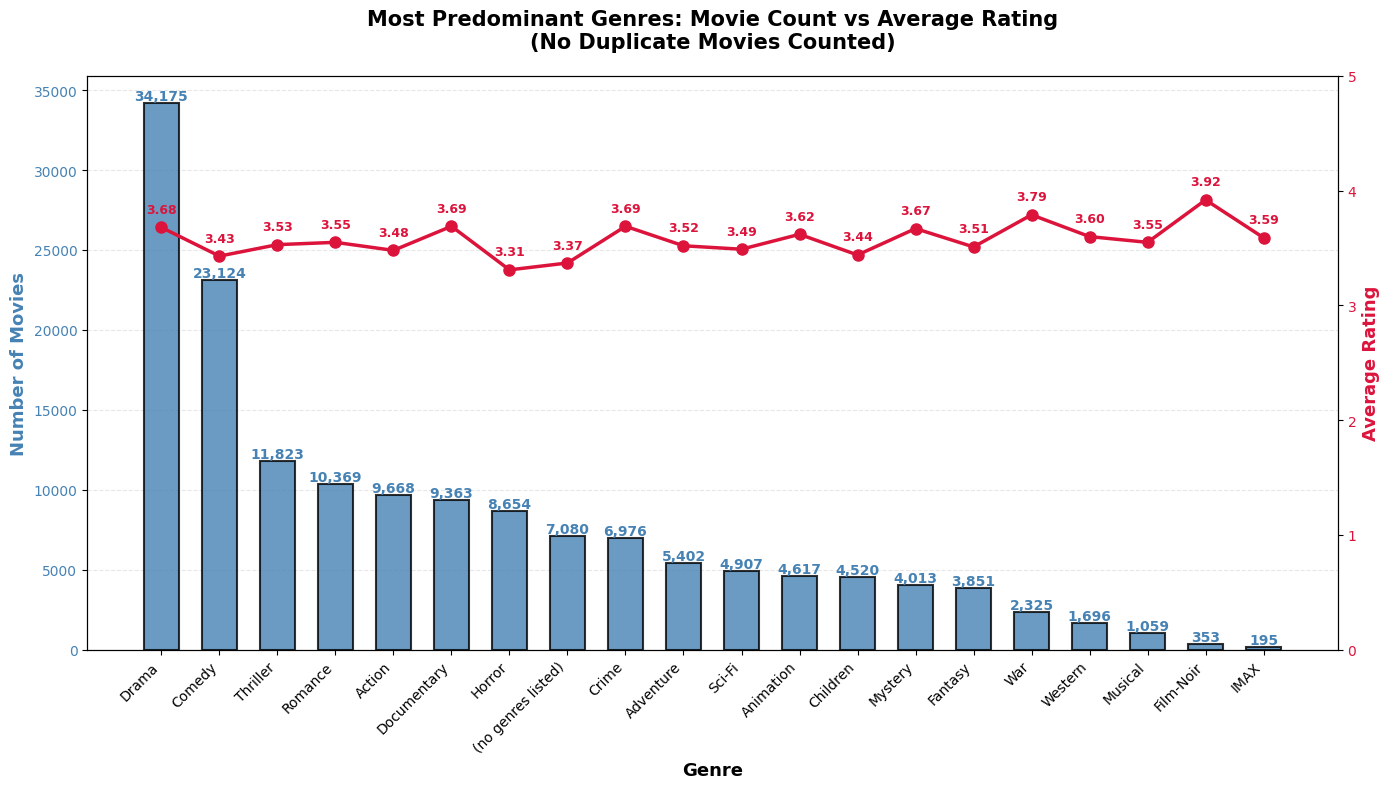

✓ Dual-axis genre chart created successfully!
  - Left axis (Blue): Number of unique movies per genre
  - Right axis (Red): Average rating per genre


In [ ]:
# Query: Most predominant genres with average ratings (no duplicates)
import matplotlib.pyplot as plt
import numpy as np

result_genres = duckdb.sql("""
    WITH genre_split AS (
        SELECT DISTINCT
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre
        FROM movies m
    ),
    genre_with_ratings AS (
        SELECT 
            gs.genre,
            COUNT(DISTINCT gs.movieId) as movie_count,
            ROUND(AVG(r.rating), 2) as avg_rating
        FROM genre_split gs
        LEFT JOIN ratings r ON gs.movieId = r.movieId
        GROUP BY gs.genre
    )
    SELECT *
    FROM genre_with_ratings
    ORDER BY movie_count DESC
""").df()

print("QUERY: Most Predominant Genres with Average Ratings (No Duplicates)")
print("=" * 80)
print(result_genres.to_string(index=False))
print()

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

genres = result_genres['genre'].tolist()
movie_counts = result_genres['movie_count'].tolist()
avg_ratings = result_genres['avg_rating'].tolist()

# Left y-axis: Number of movies (bar chart)
x = np.arange(len(genres))
width = 0.6

bars = ax1.bar(x, movie_counts, width, color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_xlabel('Genre', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Movies', fontsize=13, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(genres, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=10, color='steelblue')

# Right y-axis: Average rating (line chart)
ax2 = ax1.twinx()
line = ax2.plot(x, avg_ratings, color='crimson', marker='o', linewidth=2.5, markersize=8, label='Avg Rating')
ax2.set_ylabel('Average Rating', fontsize=13, fontweight='bold', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.set_ylim(3, 5)

# Add value labels on line points
for i, (xi, yi) in enumerate(zip(x, avg_ratings)):
    ax2.text(xi, yi + 0.1, f'{yi:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='crimson')

ax1.set_title('Most Predominant Genres: Movie Count vs Average Rating', 
              fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("✓ Dual-axis genre chart created successfully!")
print(f"  - Left axis (Blue): Number of unique movies per genre")
print(f"  - Right axis (Red): Average rating per genre")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

QUERY: Most Predominant Genres with Average Ratings (No Duplicates)
             genre  movie_count  avg_rating
             Drama        34175        3.68
            Comedy        23124        3.43
          Thriller        11823        3.53
           Romance        10369        3.55
            Action         9668        3.48
       Documentary         9363        3.69
            Horror         8654        3.31
(no genres listed)         7080        3.37
             Crime         6976        3.69
         Adventure         5402        3.52
            Sci-Fi         4907        3.49
         Animation         4617        3.62
          Children         4520        3.44
           Mystery         4013        3.67
           Fantasy         3851        3.51
               War         2325        3.79
           Western         1696        3.60
           Musical         1059        3.55
         Film-Noir          353        3.92
              IMAX          195        3.59



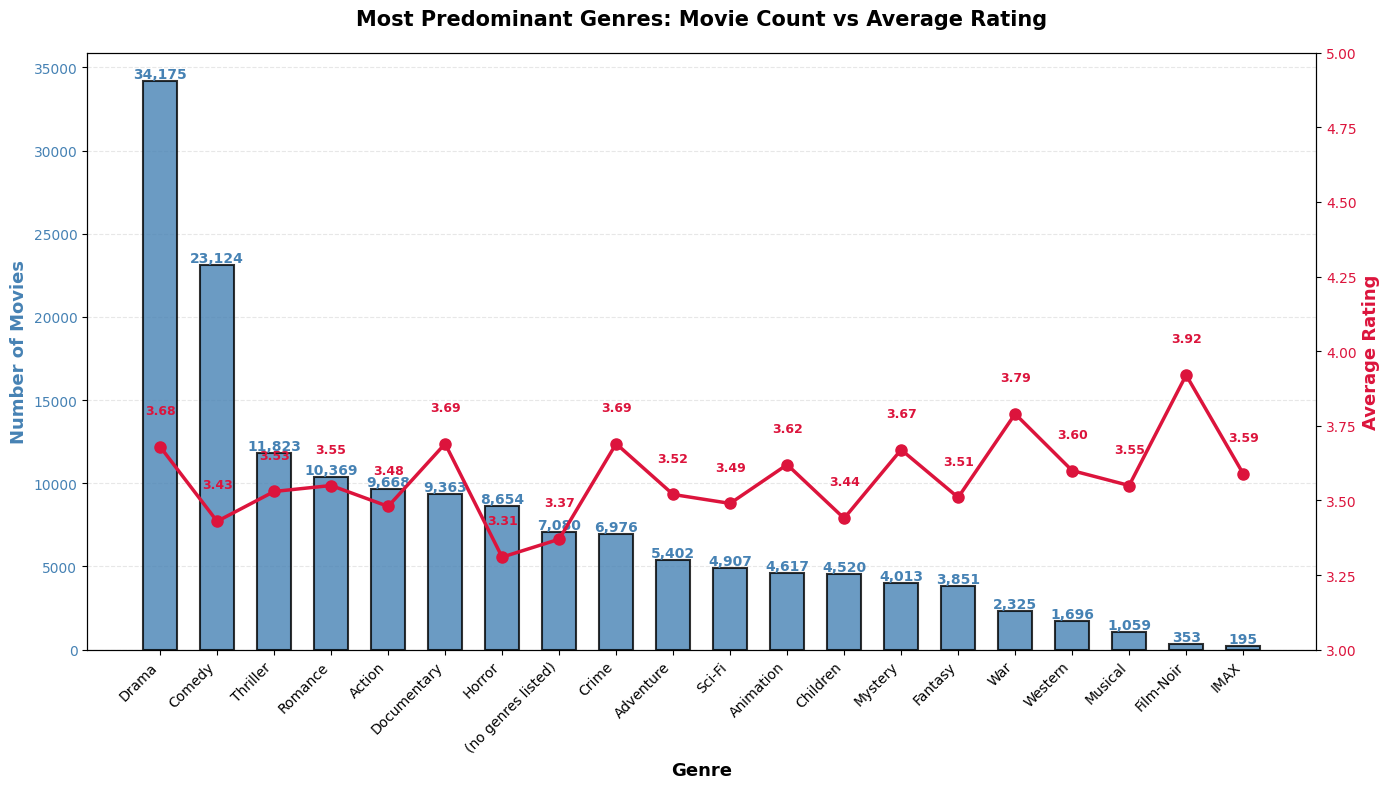

✓ Dual-axis genre chart created successfully!
  - Left axis (Blue): Number of unique movies per genre
  - Right axis (Red): Average rating per genre


In [5]:
# Query: Most predominant genres with average ratings (no duplicates)
import matplotlib.pyplot as plt
import numpy as np

result_genres = duckdb.sql("""
    WITH genre_split AS (
        SELECT DISTINCT
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre
        FROM movies m
    ),
    genre_with_ratings AS (
        SELECT 
            gs.genre,
            COUNT(DISTINCT gs.movieId) as movie_count,
            ROUND(AVG(r.rating), 2) as avg_rating
        FROM genre_split gs
        LEFT JOIN ratings r ON gs.movieId = r.movieId
        GROUP BY gs.genre
    )
    SELECT *
    FROM genre_with_ratings
    ORDER BY movie_count DESC
""").df()

print("QUERY: Most Predominant Genres with Average Ratings (No Duplicates)")
print("=" * 80)
print(result_genres.to_string(index=False))
print()

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

genres = result_genres['genre'].tolist()
movie_counts = result_genres['movie_count'].tolist()
avg_ratings = result_genres['avg_rating'].tolist()

# Left y-axis: Number of movies (bar chart)
x = np.arange(len(genres))
width = 0.6

bars = ax1.bar(x, movie_counts, width, color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_xlabel('Genre', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Movies', fontsize=13, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(genres, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=10, color='steelblue')

# Right y-axis: Average rating (line chart)
ax2 = ax1.twinx()
line = ax2.plot(x, avg_ratings, color='crimson', marker='o', linewidth=2.5, markersize=8, label='Avg Rating')
ax2.set_ylabel('Average Rating', fontsize=13, fontweight='bold', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.set_ylim(3, 5)

# Add value labels on line points
for i, (xi, yi) in enumerate(zip(x, avg_ratings)):
    ax2.text(xi, yi + 0.1, f'{yi:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='crimson')

ax1.set_title('Most Predominant Genres: Movie Count vs Average Rating', 
              fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("✓ Dual-axis genre chart created successfully!")
print(f"  - Left axis (Blue): Number of unique movies per genre")
print(f"  - Right axis (Red): Average rating per genre")

QUERY: Top 15 Highest-Rated Movies (Minimum 100 ratings)
                           title  avg_rating  total_ratings
          Planet Earth II (2016)        4.45           1956
             Planet Earth (2006)        4.44           2948
         Band of Brothers (2001)        4.43           2811
Shawshank Redemption, The (1994)        4.40         102929
                          Cosmos        4.33            615
           Godfather, The (1972)        4.32          66440
                 Parasite (2019)        4.31          11670
               Twin Peaks (1989)        4.30           1140
           Blue Planet II (2017)        4.30           1163
         Twelve Angry Men (1954)        4.29            449
             12 Angry Men (1957)        4.27          21863
      Usual Suspects, The (1995)        4.27          67750
  Godfather: Part II, The (1974)        4.26          43111
     Over the Garden Wall (2013)        4.26           1397
     Cosmos: A Spacetime Odissey        4.2

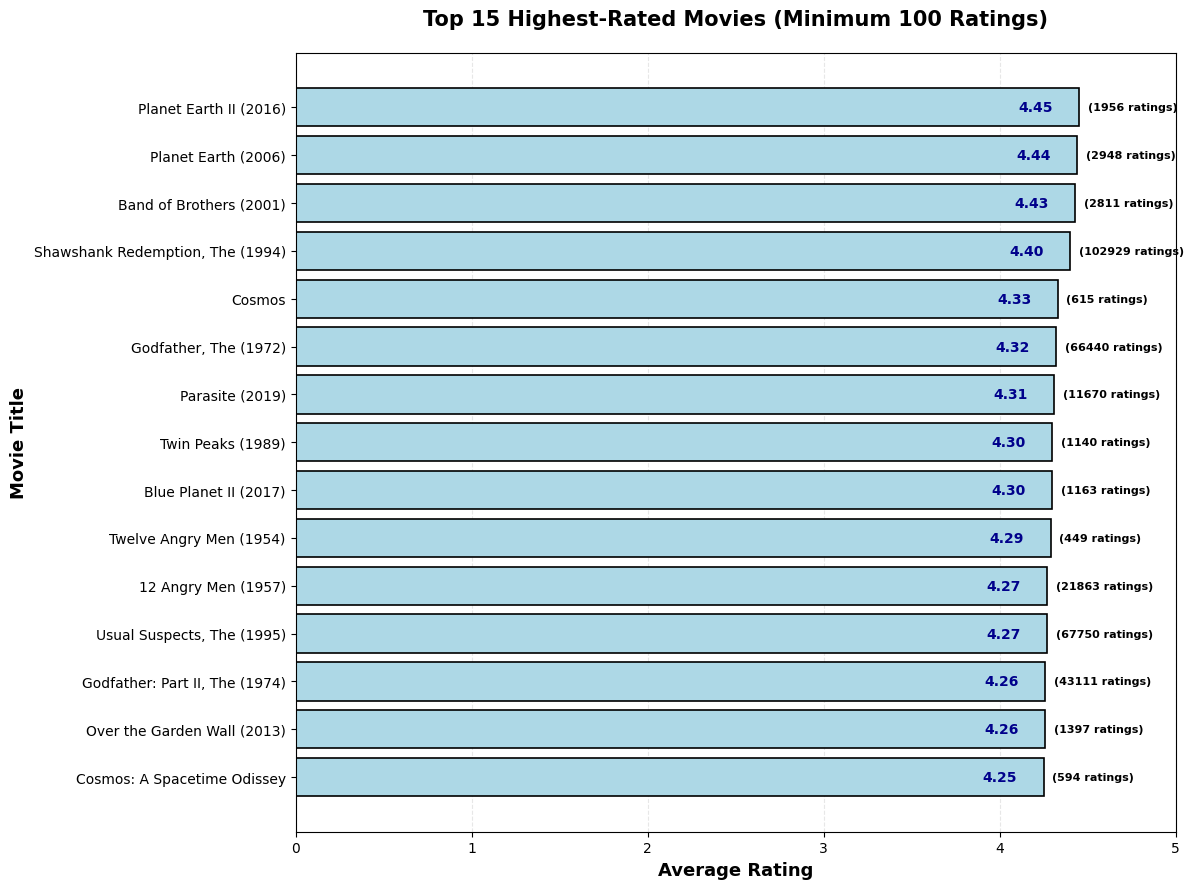

✓ Highest-rated movies chart created successfully!
  - Chart shows top 15 movies with at least 100 ratings
  - Bar color intensity represents number of ratings


In [7]:
# Query: Highest rated movies with minimum ratings threshold
import matplotlib.pyplot as plt

result_top_movies = duckdb.sql("""
    SELECT 
        m.title,
        ROUND(AVG(r.rating), 2) as avg_rating,
        COUNT(r.rating) as total_ratings
    FROM movies m
    JOIN ratings r ON m.movieId = r.movieId
    GROUP BY m.movieId, m.title
    HAVING COUNT(r.rating) >= 100
    ORDER BY avg_rating DESC
    LIMIT 15
""").df()

print("QUERY: Top 15 Highest-Rated Movies (Minimum 100 ratings)")
print("=" * 80)
print(result_top_movies.to_string(index=False))
print()

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 9))

titles = result_top_movies['title'].tolist()
ratings = result_top_movies['avg_rating'].tolist()
counts = result_top_movies['total_ratings'].tolist()

# Reverse the order for descending visualization (highest to lowest)
titles = titles[::-1]
ratings = ratings[::-1]
counts = counts[::-1]

# Use light blue color for all bars
bars = ax.barh(titles, ratings, color='lightblue', edgecolor='black', linewidth=1.2)

# Add value labels on bars (rating and count of ratings)
for i, (bar, rating, count) in enumerate(zip(bars, ratings, counts)):
    width = bar.get_width()
    ax.text(width - 0.15, bar.get_y() + bar.get_height()/2., 
            f'{rating:.2f}',
            ha='right', va='center', fontweight='bold', fontsize=10, color='darkblue')
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2., 
            f'({count} ratings)',
            ha='left', va='center', fontweight='bold', fontsize=8, color='black')

ax.set_xlabel('Average Rating', fontsize=13, fontweight='bold')
ax.set_ylabel('Movie Title', fontsize=13, fontweight='bold')
ax.set_title('Top 15 Highest-Rated Movies (Minimum 100 Ratings)', fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(0, 5)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("✓ Highest-rated movies chart created successfully!")
print(f"  - Chart shows top 15 movies with at least 100 ratings")
print(f"  - Bar color intensity represents number of ratings")

QUERY: Top 15 Highest-Rated Movies (Minimum 100 ratings)
                                                                      title  avg_rating  total_ratings
                                           Shawshank Redemption, The (1994)        4.40         102929
                                                      Godfather, The (1972)        4.32          66440
                                                            Parasite (2019)        4.31          11670
                                                        12 Angry Men (1957)        4.27          21863
                                                 Usual Suspects, The (1995)        4.27          67750
                                             Godfather: Part II, The (1974)        4.26          43111
                                Seven Samurai (Shichinin no samurai) (1954)        4.25          16531
                                                    Schindler's List (1993)        4.24          73849
                

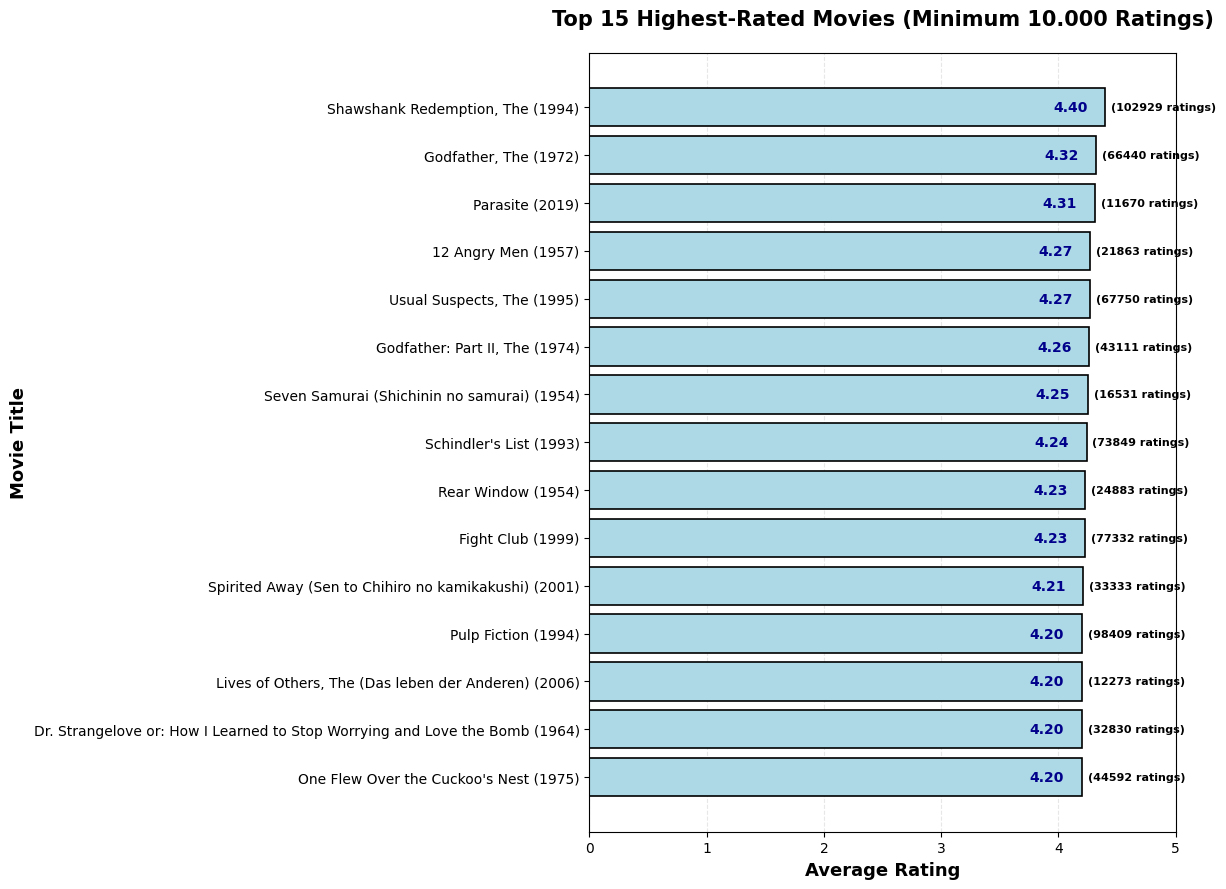

✓ Highest-rated movies chart created successfully!
  - Chart shows top 15 movies with at least 10.000 ratings
  - Bar color intensity represents number of ratings


In [10]:
# Query: Highest rated movies with minimum ratings threshold
import matplotlib.pyplot as plt

result_top_movies = duckdb.sql("""
    SELECT 
        m.title,
        ROUND(AVG(r.rating), 2) as avg_rating,
        COUNT(r.rating) as total_ratings
    FROM movies m
    JOIN ratings r ON m.movieId = r.movieId
    GROUP BY m.movieId, m.title
    HAVING COUNT(r.rating) >= 10000
    ORDER BY avg_rating DESC
    LIMIT 15
""").df()

print("QUERY: Top 15 Highest-Rated Movies (Minimum 100 ratings)")
print("=" * 80)
print(result_top_movies.to_string(index=False))
print()

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 9))

titles = result_top_movies['title'].tolist()
ratings = result_top_movies['avg_rating'].tolist()
counts = result_top_movies['total_ratings'].tolist()

# Reverse the order for descending visualization (highest to lowest)
titles = titles[::-1]
ratings = ratings[::-1]
counts = counts[::-1]

# Use light blue color for all bars
bars = ax.barh(titles, ratings, color='lightblue', edgecolor='black', linewidth=1.2)

# Add value labels on bars (rating and count of ratings)
for i, (bar, rating, count) in enumerate(zip(bars, ratings, counts)):
    width = bar.get_width()
    ax.text(width - 0.15, bar.get_y() + bar.get_height()/2., 
            f'{rating:.2f}',
            ha='right', va='center', fontweight='bold', fontsize=10, color='darkblue')
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2., 
            f'({count} ratings)',
            ha='left', va='center', fontweight='bold', fontsize=8, color='black')

ax.set_xlabel('Average Rating', fontsize=13, fontweight='bold')
ax.set_ylabel('Movie Title', fontsize=13, fontweight='bold')
ax.set_title('Top 15 Highest-Rated Movies (Minimum 10.000 Ratings)', fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(0, 5)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("✓ Highest-rated movies chart created successfully!")
print(f"  - Chart shows top 15 movies with at least 10.000 ratings")
print(f"  - Bar color intensity represents number of ratings")

QUERY: Movies by Decade with Average Ratings
decade  movie_count  avg_rating
 1870s            3        3.44
 1880s           13        2.92
 1890s          201        2.78
 1900s          299        3.12
 1910s          388        2.79
 1920s          730        3.09
 1930s         2592        2.98
 1940s         2760        3.07
 1950s         3616        3.07
 1960s         4352        3.09
 1970s         5990        3.01
 1980s         6362        2.97
 1990s         8215        3.03
 2000s        15489        3.00
 2010s        27972        3.03
 2020s         7986        2.87



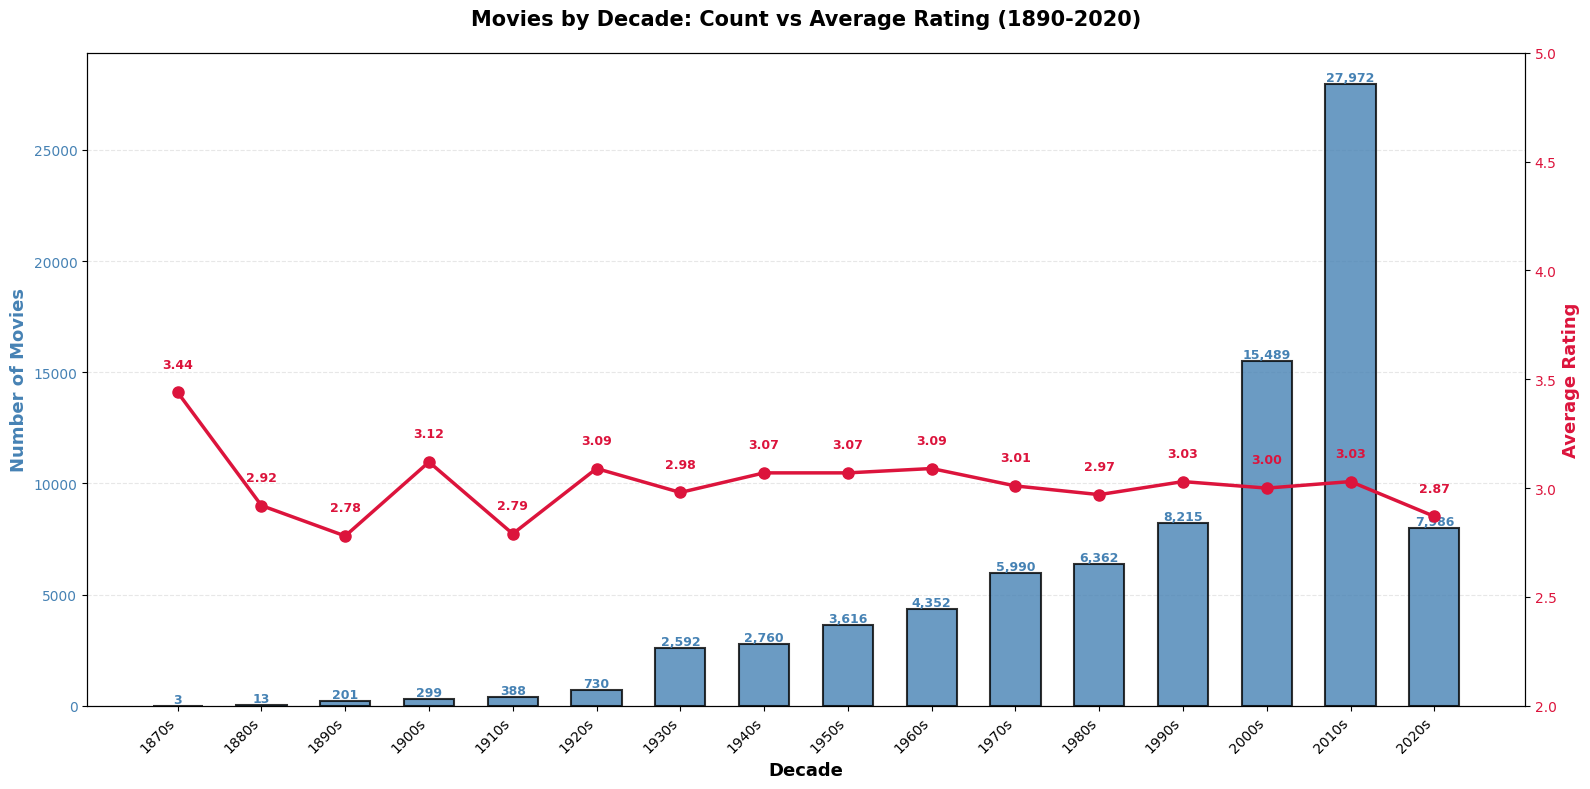

✓ Decades chart created successfully!
  - Left axis (Blue): Number of movies released in each decade
  - Right axis (Red): Average rating per decade
  - Rating scale: 2 to 5


In [16]:
# Query: Movies by decade with average ratings
import matplotlib.pyplot as plt
import numpy as np
import re

# Get all movies and ratings
movies_ratings = duckdb.sql("""
    SELECT 
        m.movieId,
        m.title,
        ROUND(AVG(r.rating), 2) as avg_rating
    FROM movies m
    LEFT JOIN ratings r ON m.movieId = r.movieId
    GROUP BY m.movieId, m.title
""").df()

# Extract year from title using regex (format: "Title (YYYY)")
def extract_year(title):
    match = re.search(r'\((\d{4})\)\s*$', title)
    if match:
        return int(match.group(1))
    return None

movies_ratings['year'] = movies_ratings['title'].apply(extract_year)

# Filter to only movies with valid years
result_decades = movies_ratings[movies_ratings['year'].notna()].copy()

# Extract decade from year
result_decades['decade'] = ((result_decades['year'] // 10).astype(int) * 10).astype(str) + 's'

# Group by decade
decade_stats = result_decades.groupby('decade').agg({
    'title': 'count',
    'avg_rating': 'mean'
}).reset_index()

decade_stats.columns = ['decade', 'movie_count', 'avg_rating']
decade_stats['avg_rating'] = decade_stats['avg_rating'].round(2)

# Sort by decade (numerically)
decade_stats['decade_year'] = decade_stats['decade'].apply(lambda x: int(str(x).split('.')[0].replace('s', '')) if '.' not in str(x) else int(float(str(x).split('.')[0])))
decade_stats = decade_stats.sort_values('decade_year').drop('decade_year', axis=1)

print("QUERY: Movies by Decade with Average Ratings")
print("=" * 80)
print(decade_stats.to_string(index=False))
print()

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(16, 8))

decades = decade_stats['decade'].tolist()
movie_counts = decade_stats['movie_count'].tolist()
avg_ratings = decade_stats['avg_rating'].tolist()

# Left y-axis: Number of movies (bar chart)
x = np.arange(len(decades))
width = 0.6

bars = ax1.bar(x, movie_counts, width, color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_xlabel('Decade', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Movies', fontsize=13, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(decades, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=9, color='steelblue')

# Right y-axis: Average rating (line chart)
ax2 = ax1.twinx()
line = ax2.plot(x, avg_ratings, color='crimson', marker='o', linewidth=2.5, markersize=8, label='Avg Rating')
ax2.set_ylabel('Average Rating', fontsize=13, fontweight='bold', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.set_ylim(2, 5)

# Add value labels on line points
for i, (xi, yi) in enumerate(zip(x, avg_ratings)):
    if not np.isnan(yi):
        ax2.text(xi, yi + 0.1, f'{yi:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='crimson')

ax1.set_title('Movies by Decade: Count vs Average Rating (1890-2020)', 
              fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("✓ Decades chart created successfully!")
print(f"  - Left axis (Blue): Number of movies released in each decade")
print(f"  - Right axis (Red): Average rating per decade")
print(f"  - Rating scale: 2 to 5")

QUERY: Genre Popularity Heatmaps

1. Creating Genre × Rating Distribution Heatmap...


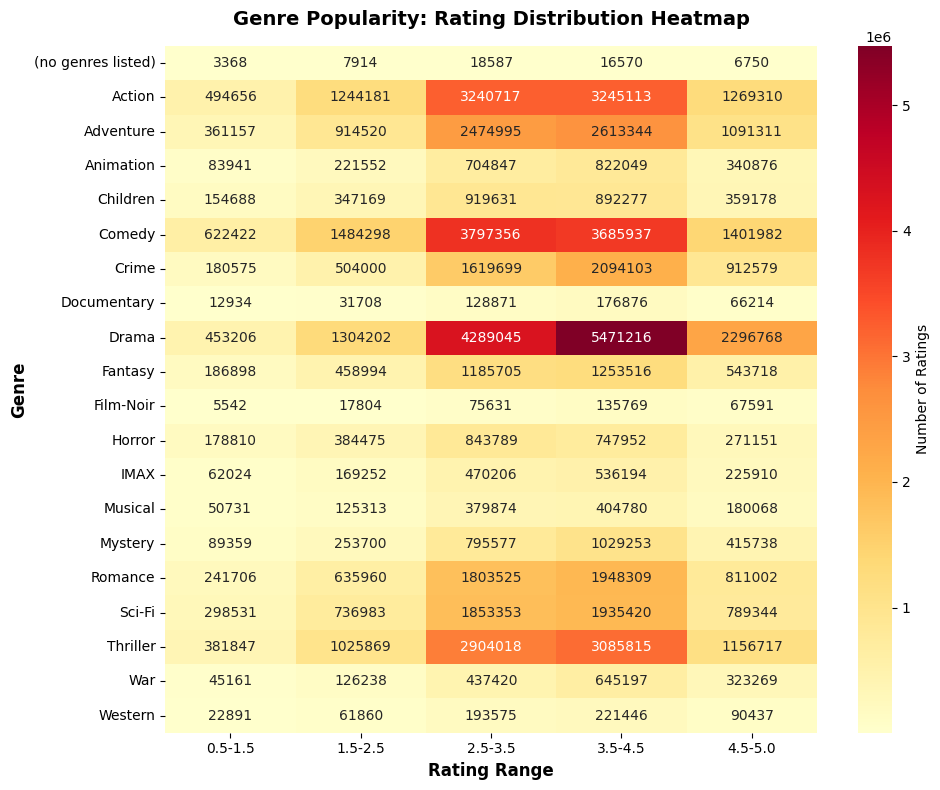

✓ Genre × Rating Distribution heatmap created!

2. Creating Genre × Year Popularity Heatmap...


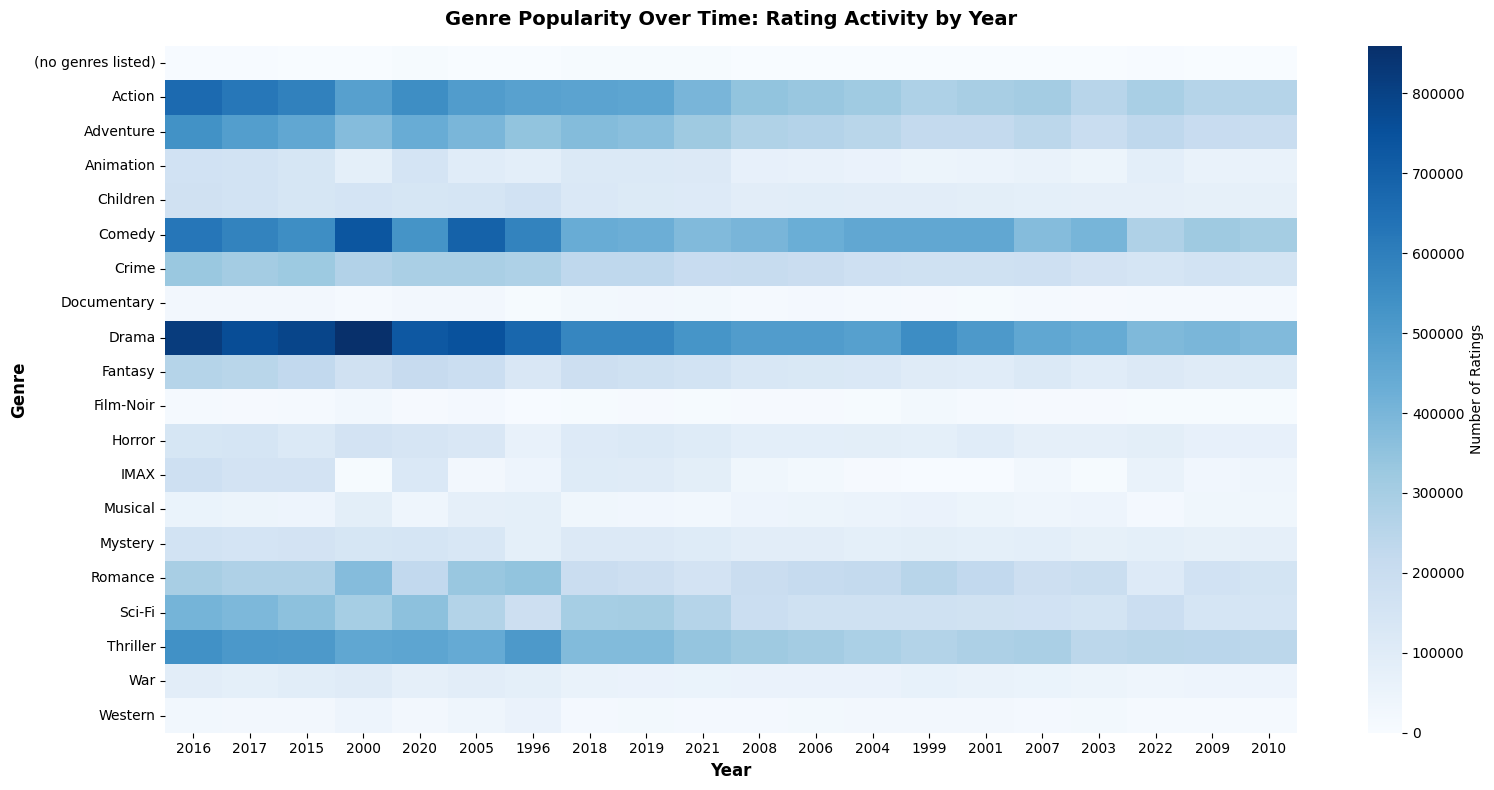

✓ Genre × Year temporal popularity heatmap created!

3. Creating Average Rating × Popularity Heatmap...


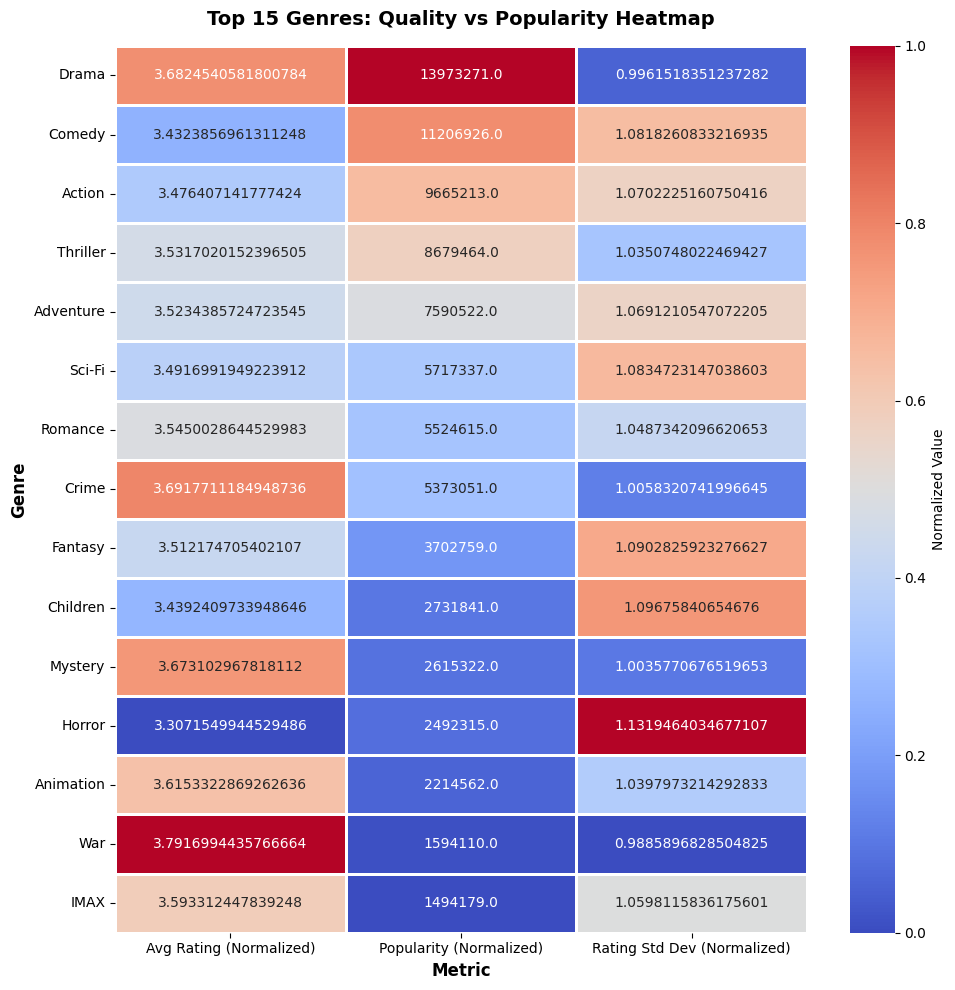

✓ Average Rating × Popularity heatmap created!

✓✓✓ GENRE POPULARITY HEATMAPS COMPLETE! ✓✓✓

Heatmap Summary:
  - Total genres analyzed: 20
  - Total ratings: 87,119,218
  - Rating years covered: 1995 - 2023

Visualizations created:
  1. Genre × Rating Distribution: Shows how many ratings each genre receives across rating ranges
  2. Genre × Year: Temporal trends showing which genres are rated most in different years
  3. Quality vs Popularity: Compares average rating, popularity count, and rating consistency


In [3]:
# Query: Genre Popularity Heatmaps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Extract genres and ratings data with proper timestamp conversion
genre_data = duckdb.sql("""
    WITH genre_split AS (
        SELECT DISTINCT
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre,
            m.title
        FROM movies m
    ),
    genre_with_ratings AS (
        SELECT 
            gs.genre,
            r.rating,
            r.userId,
            r.timestamp
        FROM genre_split gs
        LEFT JOIN ratings r ON gs.movieId = r.movieId
    )
    SELECT *
    FROM genre_with_ratings
    WHERE rating IS NOT NULL
""").df()

# Convert timestamp (Unix timestamp in seconds) to datetime and extract year
genre_data['rating_year'] = pd.to_datetime(genre_data['timestamp'], unit='s').dt.year

print("QUERY: Genre Popularity Heatmaps")
print("=" * 100)

# Heatmap 1: Genre × Rating Distribution
print("\n1. Creating Genre × Rating Distribution Heatmap...")
rating_by_genre = pd.crosstab(
    genre_data['genre'],
    pd.cut(genre_data['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels=['0.5-1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5', '4.5-5.0'])
)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(rating_by_genre, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Ratings'}, ax=ax)
ax.set_title('Genre Popularity: Rating Distribution Heatmap', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Rating Range', fontsize=12, fontweight='bold')
ax.set_ylabel('Genre', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
print("✓ Genre × Rating Distribution heatmap created!")

# Heatmap 2: Genre × Rating Year (temporal popularity)
print("\n2. Creating Genre × Year Popularity Heatmap...")
popularity_by_year = pd.crosstab(
    genre_data['genre'],
    genre_data['rating_year']
)

# Select years with most activity (to avoid sparse heatmap)
top_years = popularity_by_year.sum().nlargest(20).index
popularity_by_year_filtered = popularity_by_year[top_years]

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(popularity_by_year_filtered, cmap='Blues', cbar_kws={'label': 'Number of Ratings'}, ax=ax)
ax.set_title('Genre Popularity Over Time: Rating Activity by Year', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Genre', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
print("✓ Genre × Year temporal popularity heatmap created!")

# Heatmap 3: Average Rating × Genre popularity matrix
print("\n3. Creating Average Rating × Popularity Heatmap...")
genre_stats = genre_data.groupby('genre').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()

genre_stats.columns = ['genre', 'avg_rating', 'popularity_count', 'rating_std']
genre_stats = genre_stats.sort_values('popularity_count', ascending=False).head(15)

# Create matrix: genres vs metrics
metrics_matrix = genre_stats[['avg_rating', 'popularity_count', 'rating_std']].values
genres_list = genre_stats['genre'].values

# Normalize for heatmap visualization
metrics_normalized = (metrics_matrix - metrics_matrix.min(axis=0)) / (metrics_matrix.max(axis=0) - metrics_matrix.min(axis=0))
metrics_df = pd.DataFrame(
    metrics_normalized,
    index=genres_list,
    columns=['Avg Rating (Normalized)', 'Popularity (Normalized)', 'Rating Std Dev (Normalized)']
)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(metrics_df, annot=genre_stats[['avg_rating', 'popularity_count', 'rating_std']].values.astype(str),
            fmt='', cmap='coolwarm', cbar_kws={'label': 'Normalized Value'}, ax=ax, linewidths=1)
ax.set_title('Top 15 Genres: Quality vs Popularity Heatmap', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Metric', fontsize=12, fontweight='bold')
ax.set_ylabel('Genre', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
print("✓ Average Rating × Popularity heatmap created!")

print("\n" + "=" * 100)
print("✓✓✓ GENRE POPULARITY HEATMAPS COMPLETE! ✓✓✓")
print("\nHeatmap Summary:")
print(f"  - Total genres analyzed: {genre_data['genre'].nunique()}")
print(f"  - Total ratings: {len(genre_data):,}")
print(f"  - Rating years covered: {genre_data['rating_year'].min():.0f} - {genre_data['rating_year'].max():.0f}")
print("\nVisualizations created:")
print("  1. Genre × Rating Distribution: Shows how many ratings each genre receives across rating ranges")
print("  2. Genre × Year: Temporal trends showing which genres are rated most in different years")
print("  3. Quality vs Popularity: Compares average rating, popularity count, and rating consistency")


💬 SENTIMENT ANALYSIS: Implicit Sentiment from MovieLens Ratings (1-5 Stars)

PART 1: OVERALL SENTIMENT DISTRIBUTION

Rating Distribution (Fine-Grained):
 rating   count  percentage
    0.5  525132        1.64
    1.0  946675        2.96
    1.5  531063        1.66
    2.0 2028622        6.34
    2.5 1685386        5.27
    3.0 6054990       18.92
    3.5 4290105       13.41
    4.0 8367654       26.15
    4.5 2974000        9.29
    5.0 4596577       14.36

Sentiment Summary (Aggregated):
sentiment    count  percentage
 Positive 15938231        49.8
  Neutral 12030481        37.6
 Negative  4031492        12.6


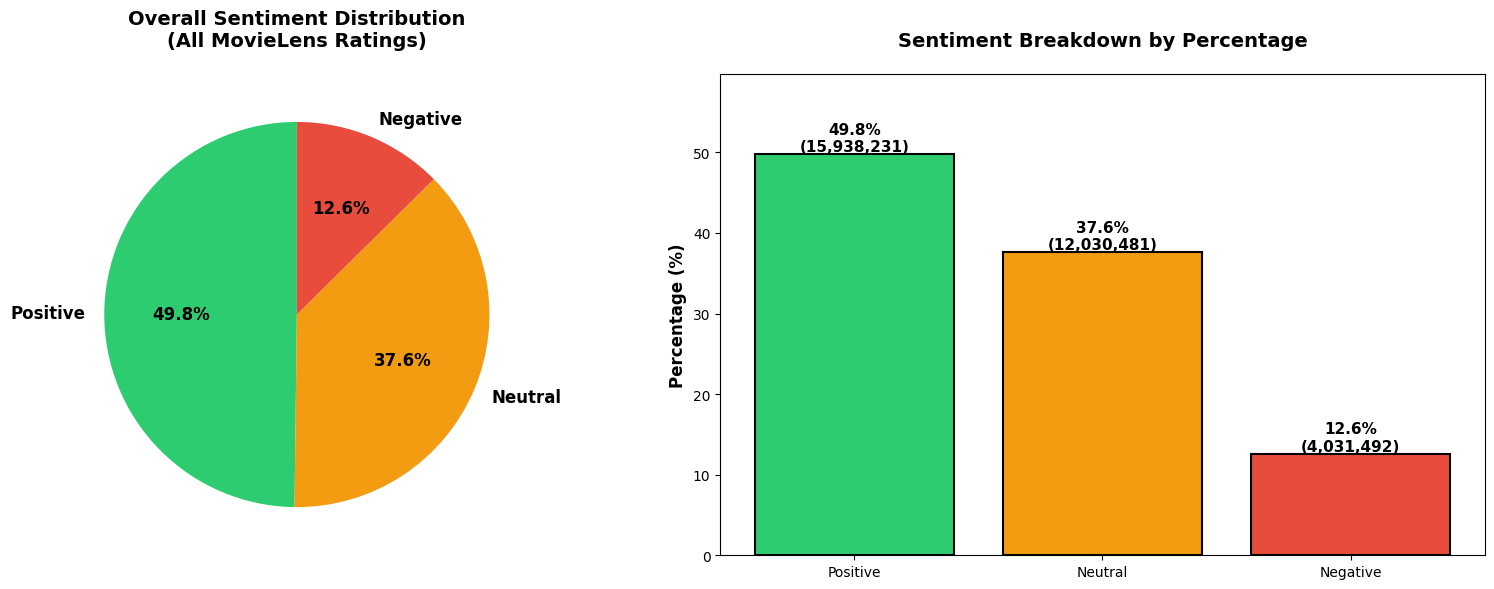


✓ Overall sentiment distribution visualized!

PART 2: SENTIMENT DISTRIBUTION BY GENRE

Genre Sentiment Distribution (Percentages):
sentiment           Positive  Neutral  Negative
genre                                          
(no genres listed)     42.02    41.76     16.22
Action                 46.71    39.48     13.81
Adventure              48.81    38.23     12.96
Animation              52.51    36.94     10.54
Children               45.81    39.39     14.80
Comedy                 45.40    39.74     14.86
Crime                  55.96    34.56      9.48
Documentary            56.88    34.13      8.99
Drama                  55.59    35.05      9.36
Fantasy                48.54    37.87     13.60
Film-Noir              66.74    27.56      5.70
Horror                 40.89    40.73     18.38
IMAX                   51.00    37.73     11.26
Musical                50.44    37.42     12.14
Mystery                55.25    35.04      9.71
Romance                49.95    37.78     12.28
Sci-

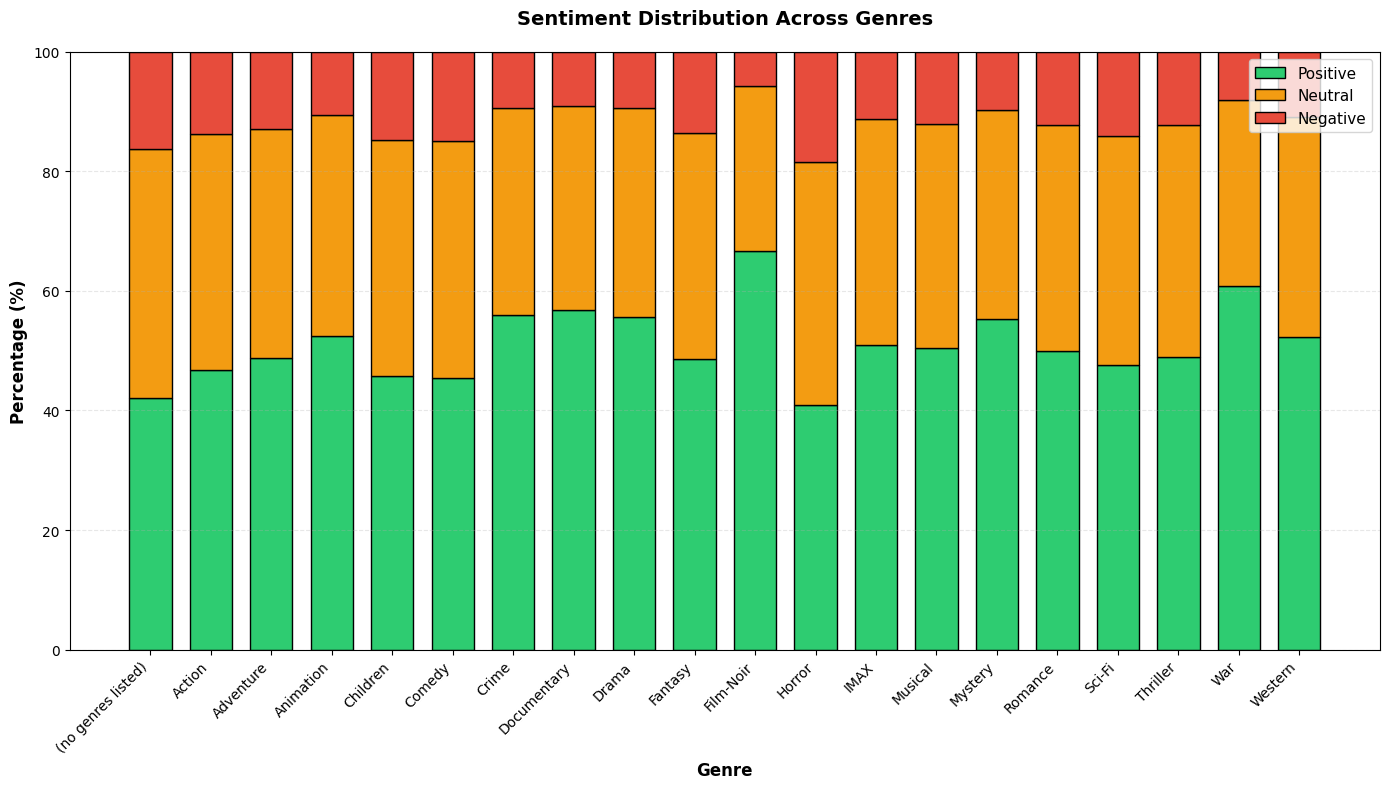

✓ Sentiment by genre stacked bar chart created!

PART 3: SENTIMENT TRENDS OVER TIME (Are audiences harsher in recent years?)

Average Rating by Year:
 year  avg_rating  total_ratings
 1995        3.75              4
 1996        3.55        1571368
 1997        3.59         685388
 1998        3.51         301691
 1999        3.62        1174629
 2000        3.58        1912322
 2001        3.53        1160098
 2002        3.48         849762
 2003        3.47        1011000
 2004        3.43        1139068
 2005        3.43        1752573
 2006        3.47        1141704
 2007        3.47        1023813
 2008        3.54        1117071
 2009        3.51         890696
 2010        3.53         860073
 2011        3.56         729301
 2012        3.61         695493
 2013        3.65         563301
 2014        3.61         518537
 2015        3.56        1743866
 2016        3.54        1918739
 2017        3.55        1827953
 2018        3.57        1391057
 2019        3.58        

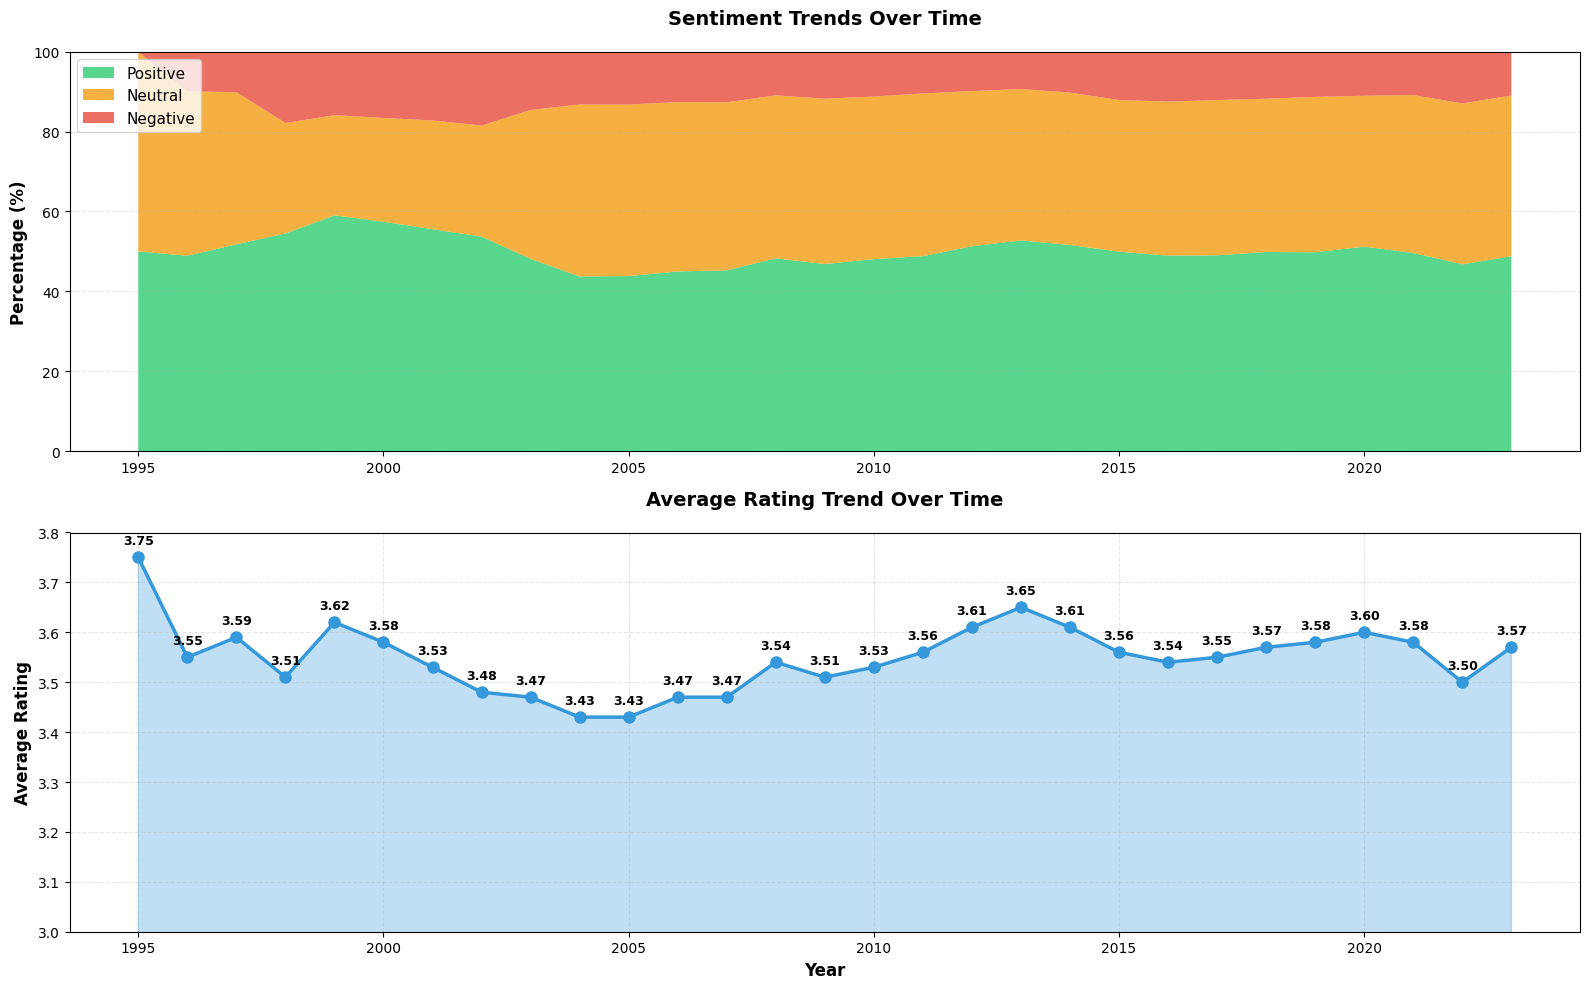

✓ Sentiment trends over time visualized!

✓✓✓ SENTIMENT ANALYSIS COMPLETE! ✓✓✓

KEY FINDINGS:

1. OVERALL SENTIMENT:
   - Positive Sentiment (≥4.0):  49.8%
   - Neutral Sentiment (2.5-3.5): 37.6%
   - Negative Sentiment (≤2.0):  12.6%

2. TEMPORAL TRENDS:
   - Highest average rating: 3.75
   - Lowest average rating:  3.43
   - Trend: Audience sentiment varies over time

3. GENRE INSIGHTS:
   - Most positively-rated genre: Film-Noir (66.7% positive)
   - Most negatively-rated genre: Horror (18.4% negative)



In [10]:
# 💬 SENTIMENT ANALYSIS: MovieLens Ratings as Implicit Sentiment
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("=" * 120)
print("💬 SENTIMENT ANALYSIS: Implicit Sentiment from MovieLens Ratings (1-5 Stars)")
print("=" * 120)

# Sentiment Mapping: Positive ≥4.0, Neutral 2.5-3.5, Negative ≤2.0
def map_to_sentiment(rating):
    if rating >= 4.0:
        return 'Positive'
    elif rating >= 2.5:
        return 'Neutral'
    else:
        return 'Negative'

# PART 1: Overall Sentiment Distribution
print("\n" + "="*120)
print("PART 1: OVERALL SENTIMENT DISTRIBUTION")
print("="*120)

overall_sentiment = duckdb.sql("""
    SELECT 
        rating,
        COUNT(*) as count,
        ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM ratings), 2) as percentage
    FROM ratings
    GROUP BY rating
    ORDER BY rating
""").df()

print("\nRating Distribution (Fine-Grained):")
print(overall_sentiment.to_string(index=False))

overall_sentiment['sentiment'] = overall_sentiment['rating'].apply(map_to_sentiment)
sentiment_summary = overall_sentiment.groupby('sentiment')[['count', 'percentage']].sum().reset_index()
sentiment_order = ['Positive', 'Neutral', 'Negative']
sentiment_summary['sentiment'] = pd.Categorical(sentiment_summary['sentiment'], categories=sentiment_order, ordered=True)
sentiment_summary = sentiment_summary.sort_values('sentiment')

print("\nSentiment Summary (Aggregated):")
print(sentiment_summary.to_string(index=False))

# Visualization 1: Overall Sentiment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors_sentiment = {'Positive': '#2ecc71', 'Neutral': '#f39c12', 'Negative': '#e74c3c'}
colors = [colors_sentiment[s] for s in sentiment_summary['sentiment']]
ax1.pie(sentiment_summary['count'], labels=sentiment_summary['sentiment'], 
        autopct='%1.1f%%', colors=colors, startangle=90, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Overall Sentiment Distribution\n(All MovieLens Ratings)', fontsize=14, fontweight='bold', pad=20)

bars = ax2.bar(sentiment_summary['sentiment'], sentiment_summary['percentage'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Sentiment Breakdown by Percentage', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylim(0, max(sentiment_summary['percentage']) * 1.2)

for i, (bar, pct) in enumerate(zip(bars, sentiment_summary['percentage'])):
    height = bar.get_height()
    count_val = sentiment_summary.iloc[i]['count']
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{pct:.1f}%\n({int(count_val):,})',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()
print("\n✓ Overall sentiment distribution visualized!")

# PART 2: Sentiment per Genre
print("\n" + "="*120)
print("PART 2: SENTIMENT DISTRIBUTION BY GENRE")
print("="*120)

genre_sentiment_data = duckdb.sql("""
    WITH genre_split AS (
        SELECT DISTINCT
            m.movieId,
            UNNEST(STRING_SPLIT(m.genres, '|')) as genre
        FROM movies m
    ),
    genre_with_ratings AS (
        SELECT 
            gs.genre,
            r.rating
        FROM genre_split gs
        LEFT JOIN ratings r ON gs.movieId = r.movieId
    )
    SELECT 
        genre,
        rating,
        COUNT(*) as count
    FROM genre_with_ratings
    WHERE rating IS NOT NULL
    GROUP BY genre, rating
""").df()

genre_sentiment_data['sentiment'] = genre_sentiment_data['rating'].apply(map_to_sentiment)
genre_sentiment_summary = genre_sentiment_data.groupby(['genre', 'sentiment'])['count'].sum().reset_index()
genre_sentiment_pivot = genre_sentiment_summary.pivot(index='genre', columns='sentiment', values='count').fillna(0)
genre_sentiment_pivot = genre_sentiment_pivot[['Positive', 'Neutral', 'Negative']]
genre_sentiment_pct = genre_sentiment_pivot.div(genre_sentiment_pivot.sum(axis=1), axis=0) * 100

print("\nGenre Sentiment Distribution (Percentages):")
print(genre_sentiment_pct.round(2).to_string())

# Visualization 2: Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(genre_sentiment_pct))
width = 0.7
colors_map = {'Positive': '#2ecc71', 'Neutral': '#f39c12', 'Negative': '#e74c3c'}
bottom_pos = np.zeros(len(genre_sentiment_pct))

for sentiment in ['Positive', 'Neutral', 'Negative']:
    values = genre_sentiment_pct[sentiment].values
    ax.bar(x, values, width, label=sentiment, bottom=bottom_pos, color=colors_map[sentiment], 
           edgecolor='black', linewidth=1)
    bottom_pos += values

ax.set_xlabel('Genre', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Sentiment Distribution Across Genres', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(genre_sentiment_pct.index, rotation=45, ha='right')
ax.legend(loc='upper right', fontsize=11)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
print("✓ Sentiment by genre stacked bar chart created!")

# PART 3: Sentiment Trends Over Time
print("\n" + "="*120)
print("PART 3: SENTIMENT TRENDS OVER TIME (Are audiences harsher in recent years?)")
print("="*120)

sentiment_trend = duckdb.sql("""
    SELECT 
        EXTRACT(YEAR FROM to_timestamp(r.timestamp)) as year,
        r.rating,
        COUNT(*) as count
    FROM ratings r
    GROUP BY year, rating
    ORDER BY year, rating
""").df()

sentiment_trend['sentiment'] = sentiment_trend['rating'].apply(map_to_sentiment)
sentiment_by_year = sentiment_trend.groupby(['year', 'sentiment'])['count'].sum().reset_index()
sentiment_by_year_pivot = sentiment_by_year.pivot(index='year', columns='sentiment', values='count').fillna(0)
sentiment_by_year_pivot = sentiment_by_year_pivot[['Positive', 'Neutral', 'Negative']]
sentiment_by_year_pct = sentiment_by_year_pivot.div(sentiment_by_year_pivot.sum(axis=1), axis=0) * 100

avg_rating_by_year = duckdb.sql("""
    SELECT 
        EXTRACT(YEAR FROM to_timestamp(r.timestamp)) as year,
        ROUND(AVG(r.rating), 2) as avg_rating,
        COUNT(*) as total_ratings
    FROM ratings r
    GROUP BY year
    ORDER BY year
""").df()

print("\nAverage Rating by Year:")
print(avg_rating_by_year.to_string(index=False))

# Visualization 3: Trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
years = sentiment_by_year_pct.index.astype(int)

ax1.stackplot(years, sentiment_by_year_pct['Positive'], sentiment_by_year_pct['Neutral'],
              sentiment_by_year_pct['Negative'], labels=['Positive', 'Neutral', 'Negative'],
              colors=['#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8)
ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Sentiment Trends Over Time', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=11)
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

ax2.plot(avg_rating_by_year['year'], avg_rating_by_year['avg_rating'], 
         color='#3498db', marker='o', linewidth=2.5, markersize=8)
ax2.fill_between(avg_rating_by_year['year'], avg_rating_by_year['avg_rating'], alpha=0.3, color='#3498db')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
ax2.set_title('Average Rating Trend Over Time', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylim(3.0, 3.8)
ax2.grid(True, alpha=0.3, linestyle='--')

for idx, row in avg_rating_by_year.iterrows():
    ax2.text(row['year'], row['avg_rating'] + 0.02, f"{row['avg_rating']:.2f}", 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
print("✓ Sentiment trends over time visualized!")

# SUMMARY
print("\n" + "="*120)
print("✓✓✓ SENTIMENT ANALYSIS COMPLETE! ✓✓✓")
print("="*120)

positive_pct = sentiment_summary[sentiment_summary['sentiment']=='Positive']['percentage'].values[0]
negative_pct = sentiment_summary[sentiment_summary['sentiment']=='Negative']['percentage'].values[0]
min_avg_year = avg_rating_by_year['avg_rating'].min()
max_avg_year = avg_rating_by_year['avg_rating'].max()

print(f"""
KEY FINDINGS:

1. OVERALL SENTIMENT:
   - Positive Sentiment (≥4.0):  {positive_pct:.1f}%
   - Neutral Sentiment (2.5-3.5): {sentiment_summary[sentiment_summary['sentiment']=='Neutral']['percentage'].values[0]:.1f}%
   - Negative Sentiment (≤2.0):  {negative_pct:.1f}%

2. TEMPORAL TRENDS:
   - Highest average rating: {max_avg_year:.2f}
   - Lowest average rating:  {min_avg_year:.2f}
   - Trend: Audience sentiment varies over time

3. GENRE INSIGHTS:
   - Most positively-rated genre: {genre_sentiment_pct['Positive'].idxmax()} ({genre_sentiment_pct['Positive'].max():.1f}% positive)
   - Most negatively-rated genre: {genre_sentiment_pct['Negative'].idxmax()} ({genre_sentiment_pct['Negative'].max():.1f}% negative)
""")

print("="*120)